## ROC Analysis to Determine of Optimum Threshold for NHISS 
In this notebook, ROC curve was analyzed to determine optimum NHISS threshold for classifying INP former and non-former drugs. We included all experimental data we have gathered until now (N=60).  
Our criteria for optimum threshold value was the point that maximizes sum of specificity and sensitivity.  
sensitivity + specificity = true positive rate - false positive rate.

In [1]:
import pandas as pd
import numpy as np
import os
import re
from __future__ import print_function, division
import matplotlib.pyplot as plt
%matplotlib inline

#### Import experimental data and NHISS values

In [5]:
df_molecules = pd.read_csv("df_molecules.csv")
df_molecules.head()

df_molecules["Experimental Category"]=None

for i,row in enumerate(df_molecules.iterrows()):
    if df_molecules.ix[i,"Experimental INP Formation"] == "Yes" :
        df_molecules.ix[i, "Experimental Category"] = int(1)
    else:
        df_molecules.ix[i, "Experimental Category"] = int(0)

df_molecules.head()

,Unnamed: 0,File Name,NAME,smiles,F,carbonyl,sulfinyl,sulfonyl,nitroso,nitro,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,NHISS,Experimental Category
0,0,ABT737.mol,ABT737,CN(C)CC[C@@H](CSc1ccccc1)Nc2ccc(cc2[N+](=O)[O-...,0,1,0,1,0,1,7.00,Yes,Validation,5,1
1,1,AZD-4547.mol,AZD-4547,C[C@@H]1CN(C[C@@H](N1)C)c2ccc(cc2)C(=O)Nc3cc([...,0,1,0,0,0,0,4.72,No,Validation,1,0
2,2,Apitolisib.mol,Apitolisib,Cc1c(sc2c1nc(nc2N3CCOCC3)c4cnc(nc4)N)CN5CCN(CC...,0,1,0,0,0,0,5.01,No,Validation,1,0
3,3,Avagacestat.mol,Avagacestat,c1cc(ccc1S(=O)(=O)[N@@](Cc2ccc(cc2F)c3ncon3)[C...,4,1,0,1,0,0,8.00,Yes,Validation,7,1
4,4,Avasimibe.mol,Avasimibe,CC(C)c1cccc(c1OS(=O)(=O)NC(=O)Cc2c(cc(cc2C(C)C...,0,1,0,1,0,0,4.79,Yes,Validation,3,1


### 1. NHISS Logistic Regression

In [6]:
# independent variable
X_train = df_molecules["NHISS"].reshape(-1, 1)

# dependent classification
y_train = np.array(df_molecules.ix[:,"Experimental Category"], dtype=int)

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# make class predictions for the training set
y_pred_class = logreg.predict(X_train)

# print first 35 observations and prediction classes
print('True:', y_train[0:35])
print('Pred:', y_pred_class[0:35])

True: [1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0]
Pred: [1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0]


In [8]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_train)[:, 1]
y_pred_prob

array([ 0.90229763,  0.11929723,  0.11929723,  0.9870558 ,  0.52796037,
        0.76269073,  0.04501791,  0.2801794 ,  0.90229763,  0.04501791,
        0.04501791,  0.90229763,  0.11929723,  0.90229763,  0.99545698,
        0.96368553,  0.04501791,  0.90229763,  0.2801794 ,  0.9870558 ,
        0.11929723,  0.90229763,  0.76269073,  0.04501791,  0.2801794 ,
        0.11929723,  0.52796037,  0.11929723,  0.2801794 ,  0.52796037,
        0.76269073,  0.04501791,  0.96368553,  0.11929723,  0.2801794 ,
        0.90229763,  0.04501791,  0.99545698,  0.90229763,  0.96368553,
        0.2801794 ,  0.11929723,  0.90229763,  0.52796037,  0.96368553,
        0.76269073,  0.52796037,  0.76269073,  0.11929723,  0.11929723,
        0.04501791,  0.90229763,  0.2801794 ,  0.99545698,  0.90229763,
        0.90229763,  0.04501791,  0.11929723,  0.2801794 ])

### 2. NHISS ROC Curve Analysis for threshold determination

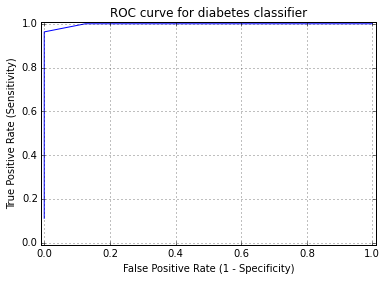

In [12]:
from sklearn import metrics

# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [13]:
print("TPR:", tpr)
print("FPR:", fpr)
print("Tresholds:", thresholds)

TPR: [ 0.11111111  0.18518519  0.33333333  0.77777778  0.96296296  1.          1.
  1.          1.        ]
FPR: [ 0.       0.       0.       0.       0.       0.125    0.375    0.71875
  1.     ]
Tresholds: [ 0.99545698  0.9870558   0.96368553  0.90229763  0.76269073  0.52796037
  0.2801794   0.11929723  0.04501791]


In [14]:
# Optimum threshold criteria is maximum specificity and sensitivity.
sum_of_specificity_and_sensitivity = np.full(thresholds.size, np.nan)

for i, threshold in enumerate(np.nditer(thresholds)):
    # print(i, threshold)
    sensitivity = tpr[i]
    specificity = 1 - fpr[i]
    sum_of_specificity_and_sensitivity[i] = sensitivity + specificity

# Determine optimum threshold based on maximum specificity and sensitivity
optimum_threshold_probability = thresholds[sum_of_specificity_and_sensitivity == max(sum_of_specificity_and_sensitivity)]
print("Optimum threshold probability: ", optimum_threshold_probability[0])

# Let's find the NHISS threshold value that corresponds to threshold probability
NHISS_range = np.arange(min(X_train)[0], max(X_train)[0], 0.01)

for NHISS in NHISS_range:
    probability = logreg.predict_proba(NHISS)[0][1]
    if probability >= optimum_threshold_probability:
        print("NHISS threshold: ", NHISS)
        break

Optimum threshold probability:  0.762690734246
NHISS threshold:  4.0
